In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [3]:
df = pd.read_csv("Train.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [48]:
X = df.values[:, :-1]
Y = df.values[:, -1]

Y = Y.reshape(-1, 1)

X.shape, Y.shape

((1600, 5), (1600, 1))

In [49]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


Data looks already normalised

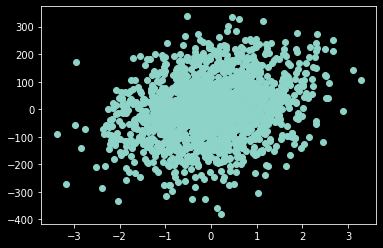

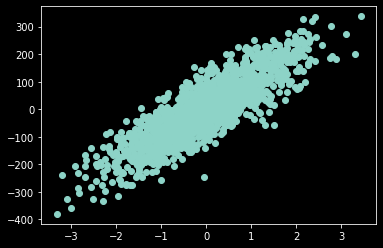

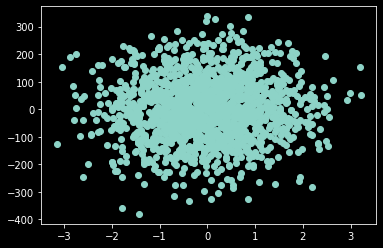

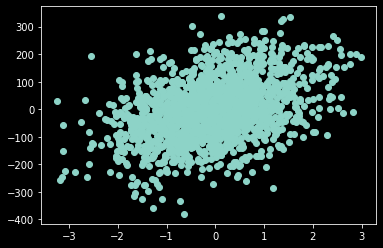

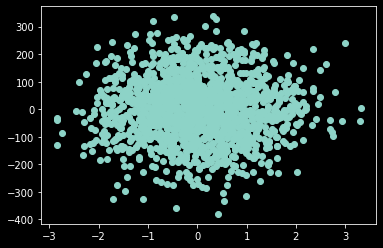

In [50]:
# Visualising
for i in range(X.shape[1]):
    plt.scatter(X[:,i], Y)
    plt.show()

Doesnt seem much clear like this, trying out LOWESS

In [51]:
def getW(query_point, X, tau):

    m = X.shape[0]
    W = np.mat(np.eye(m))

    for i in range(m):

        x = query_point
        xi = X[i]

        W[i,i] = np.exp(np.dot(x-xi, (x-xi).T)/(-2*tau*tau))

    return W

In [52]:
X = np.mat(X)
Y = np.mat(Y)

Y.shape

(1600, 1)

In [57]:
def predict(query_x, tau):

    m = X.shape[0]
    
    ones = np.ones((m,1))
    X_ = np.hstack((X,ones))

    qx = np.hstack((query_x,[[1]]))

    W = getW(qx, X_, tau)

    # theta = (X'WX)^(-1) * X'WY

    a = (W * X_)
    b = X_.T * a
    c = (W * Y)
    d = (X_.T * c)

    theta = np.linalg.pinv(b) * d

    pred = np.dot(qx, theta)

    return theta, pred

In [58]:
predict(X[0], 0.5)

(matrix([[29.7166381 ],
         [98.14835986],
         [ 6.01686845],
         [43.68007749],
         [-0.34840704],
         [ 9.77109771]]),
 matrix([[-59.26564413]]))

In [59]:
def r2_score(y, y_):

    num = np.sum((y - y_)**2)
    denom = np.sum((y - y.mean())**2)

    score = (1 - num/denom)

    return score * 100

In [62]:
preds = []

for i in range(X.shape[0]):
    preds.append(predict(X[i], 0.5)[1][0,0])

In [63]:
preds

[-59.265644133671344,
 -83.61058761940069,
 59.49054421439964,
 15.874094700265255,
 -37.70273575980372,
 -134.30306851689696,
 22.973300215018668,
 -27.437357027724545,
 8.754884777664168,
 -79.82063613308505,
 -35.79420927710043,
 69.65556425119885,
 -93.5697932283361,
 -141.0394079191228,
 -154.487303114417,
 36.17418120551123,
 -75.42389042983503,
 -35.14777360254209,
 53.32653123677106,
 74.59483925689945,
 -51.15540964282813,
 247.34302419502367,
 -143.66546651876328,
 -151.58203777759772,
 202.44039111361877,
 168.71724795187748,
 -7.292343001618214,
 -33.49523609319297,
 -67.09185057000485,
 226.20571138256457,
 -153.8811015132234,
 -128.79331994965472,
 31.5999523926628,
 -39.01512150506655,
 -146.09607426842453,
 99.25467530633365,
 -85.24035956976032,
 196.62809242177727,
 54.35272350138915,
 -122.74057336098151,
 -95.24042340014111,
 -147.91181801575863,
 9.137750856572028,
 -93.68750878931178,
 -178.95869654888244,
 -103.60787993380661,
 -379.2436706814291,
 11.87700658450

In [64]:
r2_score(np.array(preds), df.values[:,-1])

98.37283772240929

In [67]:
x_test = pd.read_csv("Test.csv")
x_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [68]:
test_data = x_test.values

In [71]:
preds = []

Xt = np.mat(test_data)

for i in range(test_data.shape[0]):

    preds.append(predict(Xt[i], 0.5)[1][0,0])

preds = np.array(preds)

In [76]:
df = pd.DataFrame(preds, columns=["target"])
df.head()

,target
0,89.976023
1,112.776042
2,-22.342660
3,-24.771131
4,-89.417678


In [77]:
df.to_csv("output.csv", index_label="id")